# NMR-MS Merge and Prematched (Clinical) Cohort

Author: Olatomiwa Bifarin<br>
Department of Biochemistry and Molecular Biology<br>
University of Georgia<br>
Edison Lab<br>

Last edited: 28JAN2020 

_This is a static version of a Jupyter notebook, and work (documentation) is still in progress_ 

**Goals**: 
1. To merge NMR and MS Dataset. 
2. Define prematched cohorts. 

<a id="0"></a>

## Notebook Content

1.  [NMR-MS Data Merge](#1)
2.  [Cohort Characteristics: Pre-Matched Group](#2)


## Dataframes
-  The original form of the MS data from the Facundo Lab at Georgia tech is uploaded as the `dfMS` dataframe.
-  `MS-Labels` is the dataframe for Mass Spectrometry detected metabolites IDs, mode, retention time and formula
-  `MS` is the dataframe for the MS Peak Intensities
-  `MSData` is the dataframe for `all` the MS Peak Intensities with patient ID and Groups
-  `dfNMR` contains representative peaks for features/metabolites from NMR
-  `combined` is the NMR merged with the MS dataset. 
-  `combined_clinic` is the dataframe that contains all combined NMR and MS samples collected in the clinic. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import scipy
#For Seaborn plots
import seaborn as sns; sns.set(style='white')
#To ignore warning
import warnings
warnings.filterwarnings('ignore')

# More sharp and legible graphics
%config InlineBackend.figure_format = 'retina'

# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=0.8)

In [3]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(scipy.__version__)

0.23.4
1.16.4
0.9.0
1.3.1


# 1. NMR-MS Data Merge
<a id="1"></a>

The original form of the MS data from the `Facundo Lab` at Georgia tech is uploaded as the `dfMS` dataframe.

In [177]:
dfMS = pd.read_excel('data/RCC_S280_combinedData_7097.xlsx')

In [178]:
dfMS_trans = dfMS.T # Transpose dataframe
IDs = np.arange(1, dfMS_trans.shape[1] + 1) # Generate a range of numbers (7098) to replace nan values in the name row
IDs = pd.Series(IDs) # creating series 
dfMS_trans.iloc[4] = dfMS_trans.iloc[4].fillna(IDs) # replace nan with the IDs, and replace the name row
dfMS_trans.head(8)

,0,1,2,3,4,5,6,7,8,9,...,7087,7088,7089,7090,7091,7092,7093,7094,7095,7096
ID,1,2,3,4,5,6,7,8,9,10,...,7088,7089,7090,7091,7092,7093,7094,7095,7096,7097
Mode,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
Molecular Weight,186.015,113.059,113.059,234.173,290.137,314.141,125.084,143.095,198.075,171.126,...,336.051,154.048,159.976,260.137,304.096,172.047,334.083,239.079,212.054,387.18
RT [min],2.317,2.792,2.889,0.884,1.512,2.666,1.181,1.221,1.901,3.507,...,0.66,1.197,4.737,2.94,0.656,3.203,2.629,2.455,2.361,0.606
Name,1,Creatinine,Creatinine,Lidocaine,Trimethoprim,Ranitidine,"4,5-Dimethyl-2-ethyloxazole",1-Aminocyclohexanecarboxylic acid,5-Acetylamino-6-amino-3-methyluracil,Gabapentin,...,7088,7089,7090,gamma-Glutamylleucine,7092,7093,7094,7095,7096,7097
Formula,NaN,C4 H7 N3 O,C4 H7 N3 O,C14 H22 N2 O,C14 H18 N4 O3,C13 H22 N4 O3 S,C7 H11 N O,C7 H13 N O2,C7 H10 N4 O3,C9 H17 N O2,...,C7 H23 N4 O P3 S2,C4 H10 O6,C5 H7 P3,C11 H20 N2 O5,NaN,NaN,C6 H19 N6 O6 P S,C6 H10 N9 P,C7 H8 N4 O4,NaN
C001,7.24885e+08,1.10388e+09,5.06818e+06,4682.6,18261.9,1322.95,61663,191620,5.61943e+07,4369.9,...,168447,81645.2,501574,43882.9,235674,141900,144189,1.65926e+06,105636,76801.7
C002,8.39383e+08,1.87456e+09,1.87657e+09,1.69931e+08,18267.8,1674.72,227698,532662,2.03319e+08,5449.04,...,36254.4,242145,876199,274884,236921,167226,114217,771149,303623,37380.4


`MS-Labels` is the dataframe for just MS detected metabolites IDs and some chemical properties.

In [179]:
MS_labels = dfMS_trans.T # Transpose data frame
MS_labels = MS_labels.filter(['ID', 'Mode', 'RT [min]', 'Name', 'Formula'], axis=1)
MS_labels.head()

,ID,Mode,RT [min],Name,Formula
0,1,positive,2.317,1,NaN
1,2,positive,2.792,Creatinine,C4 H7 N3 O
2,3,positive,2.889,Creatinine,C4 H7 N3 O
3,4,positive,0.884,Lidocaine,C14 H22 N2 O
4,5,positive,1.512,Trimethoprim,C14 H18 N4 O3


`MS` is the dataframe for the MS Peak Intensities

In [180]:
MS = dfMS_trans.drop(['Mode', 'Molecular Weight', 'Name', 'RT [min]', 'Formula'])
MS.index.name = 'MS_ID'
MS.reset_index(inplace=True) # Converts the row names into a column.
header = MS.iloc[0] # Create a new variable called 'header' from the first row of the dataset
MS = MS[1:] # Replace the dataframe with a new one which does not contain the first row
MS.rename(columns = header, inplace=True)# Rename the dataframe's column values with the header variable
MS.rename(columns={'ID':'Sample ID'}, inplace = True) # Rename column name
# To rest the row index to start from 0
MS.index = MS.index - 1 
MS.head()

,Sample ID,1,2,3,4,5,6,7,8,9,...,7088,7089,7090,7091,7092,7093,7094,7095,7096,7097
0,C001,7.24885e+08,1.10388e+09,5.06818e+06,4682.6,18261.9,1322.95,61663,191620,5.61943e+07,...,168447,81645.2,501574,43882.9,235674,141900,144189,1.65926e+06,105636,76801.7
1,C002,8.39383e+08,1.87456e+09,1.87657e+09,1.69931e+08,18267.8,1674.72,227698,532662,2.03319e+08,...,36254.4,242145,876199,274884,236921,167226,114217,771149,303623,37380.4
2,C003,7.65629e+08,1.67333e+09,7.47349e+06,8567.13,25730.9,3246.46,133905,495502,1.92514e+08,...,1.82785e+06,273594,946435,97021.7,839316,519959,467160,1.2216e+06,219606,6270.59
3,C004,1.25663e+08,1.1825e+09,1.17911e+09,6.72327e+06,10526.3,1076.99,129811,392377,1.16585e+08,...,450210,308199,343794,7427.46,275350,145776,64094.9,1.7718e+06,197519,60830.9
4,C005,1.06973e+07,8.79722e+08,8.56535e+08,438385,15913.8,1008.31,48496,122696,1.10997e+07,...,22167.5,39971.3,156251,718.724,199148,50598.8,107228,58713.6,71784.4,75589.5


___Import Dataframe containing Clinical ID___

In [181]:
path = "data/Sample_List_MS.xlsx"
fields = \
[
    'Sample ID',
    'Patient ID'
]

MSpatid = pd.read_excel(path)[fields]
MSpatid.head()

,Sample ID,Patient ID
0,C001,PD001
1,C002,PD003
2,C003,PD005
3,C004,PD012
4,C005,PD014


`MSData` is the dataframe for the MS Peak Intensities with <mark>Patient ID</mark> and <mark>Groups</mark>

In [182]:
MSData = pd.merge(MS, MSpatid, on='Sample ID') # Merge the two dataframe on Sample ID
MSData.head()

,Sample ID,1,2,3,4,5,6,7,8,9,...,7089,7090,7091,7092,7093,7094,7095,7096,7097,Patient ID
0,C001,7.24885e+08,1.10388e+09,5.06818e+06,4682.6,18261.9,1322.95,61663,191620,5.61943e+07,...,81645.2,501574,43882.9,235674,141900,144189,1.65926e+06,105636,76801.7,PD001
1,C002,8.39383e+08,1.87456e+09,1.87657e+09,1.69931e+08,18267.8,1674.72,227698,532662,2.03319e+08,...,242145,876199,274884,236921,167226,114217,771149,303623,37380.4,PD003
2,C003,7.65629e+08,1.67333e+09,7.47349e+06,8567.13,25730.9,3246.46,133905,495502,1.92514e+08,...,273594,946435,97021.7,839316,519959,467160,1.2216e+06,219606,6270.59,PD005
3,C004,1.25663e+08,1.1825e+09,1.17911e+09,6.72327e+06,10526.3,1076.99,129811,392377,1.16585e+08,...,308199,343794,7427.46,275350,145776,64094.9,1.7718e+06,197519,60830.9,PD012
4,C005,1.06973e+07,8.79722e+08,8.56535e+08,438385,15913.8,1008.31,48496,122696,1.10997e+07,...,39971.3,156251,718.724,199148,50598.8,107228,58713.6,71784.4,75589.5,PD014


*Merge NMR and MS Data*

In [183]:
dfNMR = pd.read_excel('data/binned_NMRfeatures_22JAN2020.xlsx') # Import data
dfNMR.drop(['Run_ID', 'Sample_description','Yvec', 'Run_IDOrig'], axis=1, inplace=True) # drop irrelevant features
dfNMR.head()

,Patient ID,Collection,Gender,Race,BMI,Smoker,Age,Groups,unk1,unk2,...,hypoxanthine_1,hypoxanthine_2,formate,unk10,Trigonelline_1,Trigonellinamide_1,Trigonellinamide_2,Trigonelline_2,Trigonellinamide_3,unk11
0,2000,Clinic,Male,White,31.1,Never,49.0,Control,0.001130,0.013822,...,0.027809,0.020323,0.014668,0.001156,0.007529,0.012083,0.012599,0.005315,0.011555,0.000419
1,2001,Clinic,Male,White,28.6,Never,52.0,Control,0.001702,0.010074,...,0.007833,0.015063,0.027530,0.000968,0.058346,0.014948,0.014293,0.036851,0.015069,0.000830
2,2002,Clinic,Female,White,28.6,Former,70.0,Control,0.010526,0.007970,...,0.016558,0.014049,0.019166,0.075191,0.135280,0.008480,0.008608,0.085135,0.007875,0.001235
3,2003,Clinic,Male,White,25.7,Former,54.0,Control,0.002049,0.006278,...,0.062408,0.093566,0.043322,0.004343,0.058716,0.011807,0.011317,0.041130,0.009590,0.000790
4,2004,Clinic,Male,White,25.9,Never,50.0,Control,0.002366,0.002792,...,0.034587,0.023566,0.014410,0.009594,0.038179,0.012261,0.012159,0.018619,0.014715,0.000536


In [184]:
combined = pd.merge(MSData, dfNMR, on='Patient ID') # Merge the two dataframe on Sample ID
combined.head()

,Sample ID,1,2,3,4,5,6,7,8,9,...,hypoxanthine_1,hypoxanthine_2,formate,unk10,Trigonelline_1,Trigonellinamide_1,Trigonellinamide_2,Trigonelline_2,Trigonellinamide_3,unk11
0,C001,7.24885e+08,1.10388e+09,5.06818e+06,4682.6,18261.9,1322.95,61663,191620,5.61943e+07,...,0.019153,0.014217,0.035454,0.001337,0.017210,0.006084,0.005395,0.008883,0.003132,0.001725
1,C002,8.39383e+08,1.87456e+09,1.87657e+09,1.69931e+08,18267.8,1674.72,227698,532662,2.03319e+08,...,0.013937,0.023921,0.022766,0.002879,0.034096,0.011080,0.013063,0.022937,0.010969,0.000611
2,C003,7.65629e+08,1.67333e+09,7.47349e+06,8567.13,25730.9,3246.46,133905,495502,1.92514e+08,...,0.008652,0.007889,0.021506,0.018444,0.193980,0.007303,0.007281,0.101210,0.007860,0.001027
3,C004,1.25663e+08,1.1825e+09,1.17911e+09,6.72327e+06,10526.3,1076.99,129811,392377,1.16585e+08,...,0.011827,0.019886,0.031489,0.008745,0.087607,0.006037,0.006090,0.049477,0.005081,0.000741
4,C005,1.06973e+07,8.79722e+08,8.56535e+08,438385,15913.8,1008.31,48496,122696,1.10997e+07,...,0.018709,0.021821,0.035003,0.001863,0.006908,0.010074,0.009497,0.007540,0.007582,0.000976


Non-metabolic features in the `combined` dataframe include the following: 
-  Sample ID
-  Patient ID
-  Collection
-  Gender
-  Race
-  BMI
-  Smoker
-  Age
-  Groups

combinedrevised = combined.loc[:,~combined.columns.duplicated()] <br>
_Removes all feature duplicates_ <br>
_Export `combinedrevised` dataframe_ <br>
combinedrevised.to_excel('combinedNMRMS_DuplicatesRemoved.xlsx')

The shape of the MS, NMR, and the combined dataframe

In [185]:
print(dfNMR.shape)
print (MSData.shape)
print (combined.shape)

(284, 56)
(280, 7099)
(256, 7154)


The group numbers in MS, NMR, and the combined dataframe

In [186]:
print(dfNMR.Groups.value_counts())
#print(dfMS.Groups.value_counts())
print(combined.Groups.value_counts())

Control    179
RCC        105
Name: Groups, dtype: int64
Control    174
RCC         82
Name: Groups, dtype: int64


In [187]:
combined['Collection'].value_counts()

Clinic    205
OR         51
Name: Collection, dtype: int64

`combined_clinic` is the dataframe that contains all combined NMR and MS samples collected in the clinic. 

In [188]:
# Remove all operating samples because of the potential bais
combined_clinic = combined[combined['Collection'] != 'OR']
print(combined_clinic.Groups.value_counts())

Control    174
RCC         31
Name: Groups, dtype: int64


### [Go back to notebook content](#0)

# 2. Cohort Characteristics: Pre-Matched Groups
<a id="2"></a>

_Pie Chart Function_

In [189]:
def pieChart(dataframe, tilt_num, explode=False, shadow=False): 
    '''
    DEPENDENCY: matplotlib.pyplot.pie
    
    INPUTS: 
    dataframe = A pandas dataframe with category in the first column and associated data in the second column
    tilt_num = A number that specifies the amount of offset to apply to the wedge corresponding to the dataset 
    on the last row. The purpose of this is to make pie-chart annotation visible in the case of an overlapping 
    annotation. For best results, choose number between 0 and 1.  
    
    explode = Boolean. Set to True to make the tilt_num parameters applicable. 
    
    shadow = Boolean. Set to True for wedge shadows
    
    OUTPUTS: A pie chart figure. 
    
    '''
    if explode==False: 
        plt.pie(
        # using data
        dataframe.iloc[:, 1],
        # labels
        labels=dataframe.iloc[:, 0],
        # with no shadows
        shadow=shadow,
        # with the start angle at 90%
        startangle=90,
        # with the percent listed as a fraction
        autopct='%1.1f%%')
    
        # View the plot drop above
        plt.axis('equal')
        # View the plot
        plt.tight_layout()
        fig = plt.plot()
        return fig
    else:
        lst = [0] * dataframe.shape[0] # create a list of length equal to number of pie, sets to zero
        lst[-1] = tilt_num # replace the last digit of lst with the tilt_num
        plt.pie(dataframe.iloc[:, 1], labels=dataframe.iloc[:, 0],
        shadow=shadow, explode=lst, startangle=90, autopct='%1.1f%%')
    
        # View the plot drop above
        plt.axis('equal')
        # View the plot
        plt.tight_layout()
        fig = plt.plot()
    return fig

### a. Categorical Meta-Data

In [190]:
combined_clinic = combined[combined['Collection'] != 'OR']
combined_clinic.Race.value_counts()

White          183
Black/AA        14
Unk/Missing      6
Mixed            1
Asian            1
Name: Race, dtype: int64

In [191]:
combined_clinic['Race'] = combined_clinic['Race'].map({'White': 'White',
                                         'Black/AA': 'Black/AA', 
                                         'Unk/Missing': 'Others',
                                         'Mixed': 'Others', 
                                         'Asian': 'Others'})
combined.Race.value_counts()

White                             218
Black/AA                           25
Unk/Missing                         8
Asian                               2
Mixed                               1
American-Indian/Alaskan-Native      1
Name: Race, dtype: int64

In [192]:
dControl = combined_clinic[(combined_clinic['Groups'] == 'Control')]
dRCC = combined_clinic[(combined_clinic['Groups'] == 'RCC')]

___Race___

In [193]:
print(dControl['Race'].value_counts())
print(dControl['Race'].value_counts(normalize=True)*100)
print(dRCC['Race'].value_counts())
print(dRCC['Race'].value_counts(normalize=True)*100)

White       162
Others        7
Black/AA      5
Name: Race, dtype: int64
White       93.103448
Others       4.022989
Black/AA     2.873563
Name: Race, dtype: float64
White       21
Black/AA     9
Others       1
Name: Race, dtype: int64
White       67.741935
Black/AA    29.032258
Others       3.225806
Name: Race, dtype: float64


_Healthy Control Race Prematched_

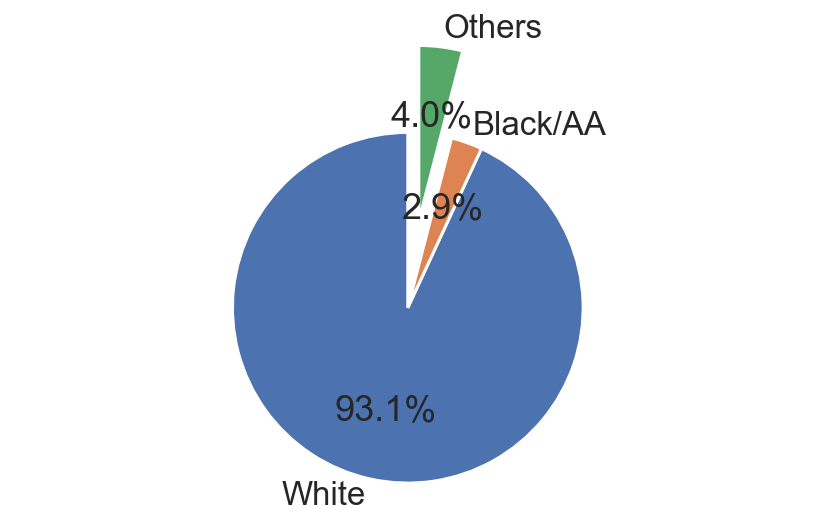

In [194]:
# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=1.0)
raw_data = {'Race': ['White', 'Black/AA', 'Others'], 
            'Numbers': [162, 5, 7]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=True, shadow = False);
#plt.title('Pre-matched cohort race')
#plt.savefig('prematch_N_Race.svg')   # save the figure to file

___Smoking History___

In [195]:
combined_clinic.Smoker.value_counts()

Never      150
Former      46
Current      9
Name: Smoker, dtype: int64

In [196]:
combined_clinic['Smoker'] = combined_clinic['Smoker'].map({'Never': 'Never',
                                         'Former': 'Former/Current', 
                                         'Current': 'Former/Current'})

In [197]:
combined_clinic.Smoker.value_counts()

Never             150
Former/Current     55
Name: Smoker, dtype: int64

In [198]:
dControl = combined_clinic[(combined_clinic['Groups'] == 'Control')]
dRCC = combined_clinic[(combined_clinic['Groups'] == 'RCC')]
print(dControl['Smoker'].value_counts())
print(dControl['Smoker'].value_counts(normalize=True)*100)
print(dRCC['Smoker'].value_counts())
print(dRCC['Smoker'].value_counts(normalize=True)*100)

Never             131
Former/Current     43
Name: Smoker, dtype: int64
Never             75.287356
Former/Current    24.712644
Name: Smoker, dtype: float64
Never             19
Former/Current    12
Name: Smoker, dtype: int64
Never             61.290323
Former/Current    38.709677
Name: Smoker, dtype: float64


[]

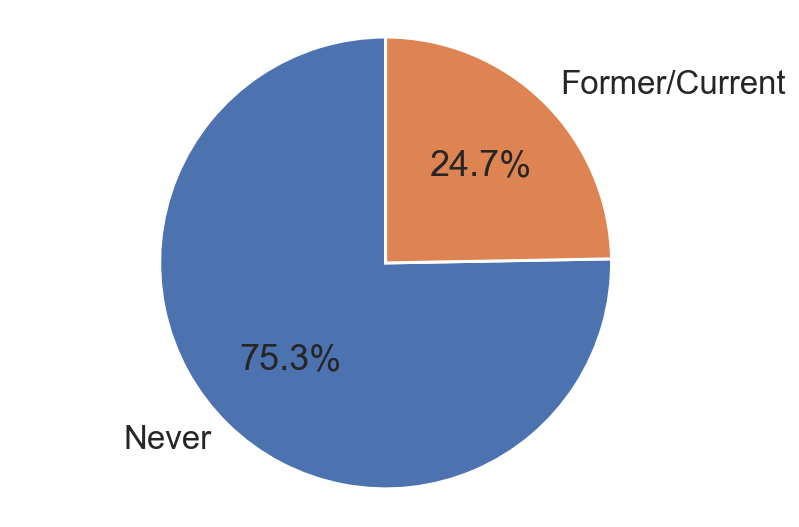

In [199]:
# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=1.0)
raw_data = {'Smoker': ['Never', 'Former/Current'], 
            'Numbers': [131, 43]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=False, shadow = False)
#plt.savefig('prematch_N_Smoke.svg') 

___Gender___

In [200]:
print(dControl['Gender'].value_counts())
print(dControl['Gender'].value_counts(normalize=True)*100)
print(dRCC['Gender'].value_counts())
print(dRCC['Gender'].value_counts(normalize=True)*100)

Male      145
Female     29
Name: Gender, dtype: int64
Male      83.333333
Female    16.666667
Name: Gender, dtype: float64
Female    17
Male      14
Name: Gender, dtype: int64
Female    54.83871
Male      45.16129
Name: Gender, dtype: float64


[]

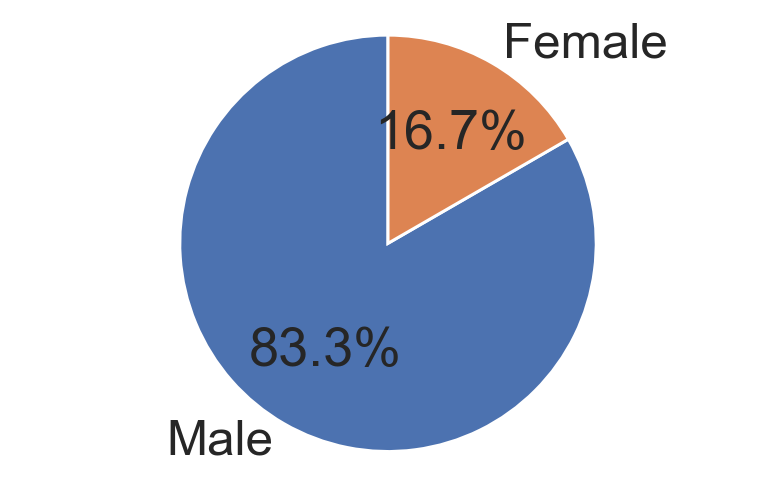

In [201]:
# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=1.5)
raw_data = {'Gender': ['Male', 'Female'], 
            'Numbers': [145, 29]}
pie = pd.DataFrame(raw_data)
pieChart(pie, 0.5, explode=False, shadow = False)
#plt.savefig('prematch_N_Gender.svg') 

### b. Quantitative Meta-Data

In [202]:
def cohortQuant(cohortID, dfControl, dfTreat, alpha=0.05, var=True):
    '''
    Function conducts a T-test for the numerical cohort characteristics between two groups
    
    Inputs: 
    cohortID = A list of the numerical cohort characteristics
    dfControl = A pandas dataframe containing the control group cohort data
    dfTreat =  A pandas dataframe containing the treatment group cohort data
    alpha = alpha for statistical significant judgment, Default 0.05
    var = If True (default), perform a standard independent 2 sample test that assumes 
    equal population variances [1]. If False, perform Welch’s t-test, which does not 
    assume equal population variance
    
    Outputs: A pandas dataframe with p-values of numerical cohort characteristics. 
    
    '''
    pvaluelist = []
    commentlist = []
    for conf in cohortID:
        statistic, pvalue = scipy.stats.ttest_ind(dfControl[conf], dfTreat[conf], 
                                              equal_var=var)
        pvaluelist.append(pvalue)
        if pvalue > alpha:
            comment = 'not significant'
        else:
            comment = 'significant'
        commentlist.append(comment)
    ConfTable = pd.DataFrame({'Confounder': cohortID, 
                              'T-test p-value': pvaluelist, 
                              'Comment': commentlist})
    return ConfTable

Welch t-test was carried out.

In [203]:
confounderID = ['Age', 'BMI']
dControl = combined_clinic[(combined_clinic['Groups'] == 'Control')]
dRCC = combined_clinic[(combined_clinic['Groups'] == 'RCC')]
cohortQuant(confounderID, dControl, dRCC, var=False)

,Confounder,T-test p-value,Comment
0,Age,0.034697,significant
1,BMI,0.112672,not significant


In [204]:
BMI_Age = combined_clinic.filter(['BMI', 'Age', 'Groups']);

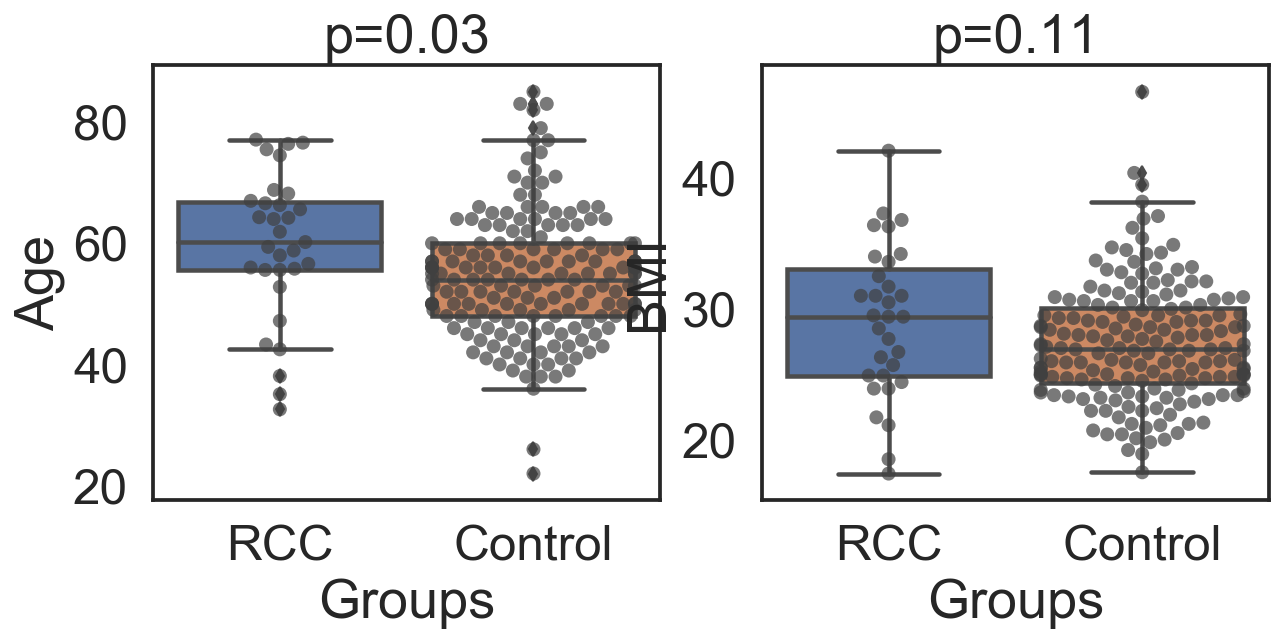

In [205]:
# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=1.5)
_, axes = plt.subplots(1, 2, sharey=False, figsize=(10, 4))

Age = sns.boxplot(x='Groups', y='Age', data=BMI_Age, ax=axes[0]);
sns.swarmplot(x='Groups', y='Age', data=BMI_Age, s =7, alpha=0.7, color=".25", ax=axes[0])
BMI = sns.boxplot(x='Groups', y='BMI', data=BMI_Age, ax=axes[1]);
sns.swarmplot(x='Groups', y='BMI', data=BMI_Age, s =7, alpha=0.7, color=".25", ax=axes[1])
Age.set_title('p=0.03',loc='center');
BMI.set_title('p=0.11',loc='center');
#plt.savefig('prematch_Age_BMI.svg') 

In [206]:
print('Healthy Control mean age is', dControl['Age'].mean())
print('Healthy Control standard deviation age is', dControl['Age'].std())
print('RCC mean age is', dRCC['Age'].mean())
print('RCC standard deviation age is', dRCC['Age'].std())

Healthy Control mean age is 54.44827586206897
Healthy Control standard deviation age is 10.32563297973208
RCC mean age is 59.50322580645161
RCC standard deviation age is 12.089623205348948


In [207]:
print('Healthy Control mean age is', dControl['BMI'].mean())
print('Healthy Control standard deviation age is', dControl['BMI'].std())
print('RCC mean age is', dRCC['BMI'].mean())
print('RCC standard deviation age is', dRCC['BMI'].std())

Healthy Control mean age is 27.324137931034475
Healthy Control standard deviation age is 4.521163222291269
RCC mean age is 29.106451612903225
RCC standard deviation age is 5.800341109732022


## Export datasets

In [209]:
# Export combined clinic
#combined_clinic.to_excel('combined_clinic.xlsx')

In [210]:
# Export combined
#combined.to_excel('combined.xlsx')

In [ ]:
# Export the MS_Label
#MS_labels.to_excel('MS_labels.xlsx')